In this program we get informations of the craters which are created in astro_workplace. With does informations and the calculation of a the diameter of a specific crater done in pixel_converter. We can now calculate the real diameter and depth of the craters. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 10, 10
from matplotlib.pyplot import imshow
from numpy.linalg import norm
import rawpy
import PIL
from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.umath import *
import os

#dummyvalues
r_mond=1737000. #r_mond in meter
pixerr=10

import import_ipynb
from Diameter_Depth_functions import betafinder, diameter_depth, arccosunc

importing Jupyter notebook from Diameter_Depth_functions.ipynb
rad:  0.266405305489
deg:  15.2638996444


Phase angle of the Moon (phi from proposal) with http://www.mondkalender-online.de/mondkalender/wunschkinder/mondwinkel-rechner.php.

Time Tim 01: 15.01.2019 22:00 -> websiteangle= 108°

Time Noa: 16.01.2019 21:00 -> websiteangle= 120°

Time Jennifer: 16.01.2019 01:10 -> websiteangle= 109°

Time Jennifer: 16.01.2019 18:35 -> websiteangle= 118°

In [5]:
degtorad=np.pi/180.
websiteangle=118. # This value has to be changed for each folder!!!!
phi=(180.-websiteangle)*degtorad

We write down the data of the day we file we want to work with down. We get the datas from the workfile script. Since the reference crater can also be in an other file with the same magnification, we call the file with the reference value dia_pix_ref.

In [9]:
coord_unsere = [(ufloat(386.72507112037977,14.076096077469312),ufloat(-2782.0903419371834,12.285361808157282)),(ufloat(323.96653613099437,14.034281494878655),ufloat(-2747.9130880060607,12.274067292919659)),(ufloat(247.5692138570717,13.92966272224734),ufloat(-2660.942830503799,12.263000271306675)),(ufloat(408.3351776499769,13.996071864725762),ufloat(-2716.396862310457,12.289709853197117)),(ufloat(307.7797853642369,13.869794556500267),ufloat(-2610.1739304359558,12.271476327447235)),(ufloat(297.57007012006756,13.818093832825829),ufloat(-2565.7035761837064,12.269910107114967)),(ufloat(13.138451192380698,13.979168700320255),ufloat(-2702.365175365408,12.247492541125501)),(ufloat(218.34503666163607,13.869244330045335),ufloat(-2609.703775857643,12.25954712815283)),(ufloat(764.1457799690038,13.717413480938644),ufloat(-2477.3110179912683,12.39481688135473)),(ufloat(796.3525828978907,13.5866263645634),ufloat(-2358.574591216299,12.407419244050638)),(ufloat(900.8012676412775,13.583960023123433),ufloat(-2356.1038297523223,12.451766746331101)),(ufloat(839.9895096881031,13.489938087477881),ufloat(-2267.5800466326077,12.425302056579344)),(ufloat(868.4396373683734,13.758687885980725),ufloat(-2513.8454924259836,12.437460100154153)),(ufloat(680.3188597442349,13.601488765957722),ufloat(-2372.3084947339235,12.364402053387677)),(ufloat(648.6538653144854,13.582258898733313),ufloat(-2354.526384209708,12.353814143500898)),(ufloat(161.87301747302573,13.847167073263485),ufloat(-2590.7844301394653,12.25409971888738)),(ufloat(217.51160919960014,13.775856508357194),ufloat(-2528.918946518122,12.259454989773925)),(ufloat(288.24146343404567,13.680878571825179),ufloat(-2444.609717251381,12.268525075409118)),(ufloat(220.7561213200513,13.67391949893545),ufloat(-2438.3411156654493,12.259815662437587)),(ufloat(420.97401327769836,13.517891284524081),ufloat(-2294.1907179344244,12.29236162987091)),(ufloat(476.76725793844156,13.413359647556813),ufloat(-2193.319575106861,12.305025770006095)),(ufloat(511.4446106775391,13.398869427691432),ufloat(-2179.031920280204,12.313682674287904)),(ufloat(554.4326699256311,13.326194523439234),ufloat(-2106.153026528553,12.325248191627045)),(ufloat(624.8529566769657,13.32001141539865),ufloat(-2099.854480712958,12.346182293932262)),(ufloat(675.2706138759045,13.266834259387583),ufloat(-2045.0078527163912,12.36268086788232)),(ufloat(221.29784261426482,13.525957373599843),ufloat(-2301.822366712501,12.259876401497234)),(ufloat(95.62594529147573,13.495057851507193),ufloat(-2272.4730947489456,12.249770202639189)),(ufloat(-49.185508750699036,13.64622610666159),ufloat(-2413.266074360429,12.24806292789955)),(ufloat(236.12730594005973,13.42014268890308),ufloat(-2199.9811821524154,12.261596806880462)),(ufloat(-110.18182662379007,13.446636802333678),ufloat(-2225.841811069152,12.250530635260722)),(ufloat(76.27218328120074,13.426091158987873),ufloat(-2205.809361735933,12.248925652461065)),(ufloat(65.15162690298533,13.320209779495277),ufloat(-2100.056796093507,12.24852638859038)),(ufloat(162.09338722844163,13.319229273573233),ufloat(-2099.0565984775576,12.254117835296432)),(ufloat(100.97197458723122,13.308946857761107),ufloat(-2088.5432871552252,12.25003699873194)),(ufloat(-42.72621708569414,13.314478501609969),ufloat(-2094.2046965848294,12.247912200237488)),(ufloat(327.1219377286758,13.464997676791839),ufloat(-2243.6183205963926,12.27458776666113)),(ufloat(356.733096079231,13.417455459202989),ufloat(-2197.344073842055,12.279716660240556)),(ufloat(326.2586904858162,13.247664973676777),ufloat(-2024.9275635328524,12.274444877610856)),(ufloat(293.68285492202193,13.173766905188327),ufloat(-1945.8632416184619,12.269327624862688)),(ufloat(245.36671489838696,13.138698555319605),ufloat(-1907.3578928739814,12.262724964970946)),(ufloat(312.09613042727864,13.055644157688922),ufloat(-1813.33925882481,12.272154302934476)),(ufloat(131.77389618396978,13.120972063804155),ufloat(-1887.6350639234286,12.251856666171618)),(ufloat(2.5180994767948475,13.122165365200901),ufloat(-1888.9683785396758,12.247450323827346)),(ufloat(879.197325576207,12.954968789531835),ufloat(-1693.2634931290909,12.44215967222956)),(ufloat(801.6570083571374,12.883755920014204),ufloat(-1603.5190897384548,12.409543471337297)),(ufloat(649.2313964442004,12.902348691626946),ufloat(-1627.3793234232921,12.35400281626096)),(ufloat(608.1603816564204,12.811825971859113),ufloat(-1508.005971916097,12.340997261053282)),(ufloat(468.51048419500984,12.71236225387771),ufloat(-1365.9688754160622,12.30305323834657)),(ufloat(584.5917140349267,12.604702935095158),ufloat(-1194.8262145713097,12.333911907330663)),(ufloat(-228.25143733642693,13.11433596567958),ufloat(-1880.2053072183726,12.260669246750123)),(ufloat(-2.702835050840891,13.128459257938678),ufloat(-1895.9872341644525,12.24745056870828)),(ufloat(123.69534348607738,13.121046481602411),ufloat(-1887.7182373466212,12.251332846941656)),(ufloat(429.124098441666,12.557947230147567),ufloat(-1112.8507091905296,12.294114165256582)),(ufloat(564.7140920457257,12.483748415889826),ufloat(-969.366968767628,12.328150845867604)),(ufloat(598.2961309357866,12.406838673095988),ufloat(-794.8968340329972,12.337998235441622)),(ufloat(871.589332169971,12.428599386579004),ufloat(-847.7969309524874,12.438830259931688)),(ufloat(522.2857898169838,12.341688983547128),ufloat(-610.4132751302432,12.316512422774126)),(ufloat(-386.01687047813044,12.708023335240837),ufloat(-1359.4616380738541,12.285223289848123)),(ufloat(67.53387660888733,13.214508244655617),ufloat(1989.7868437886823,12.248606635326498)),(ufloat(870.81012073209,13.232780762119193),ufloat(2009.2178706241411,12.438490844712438)),(ufloat(959.9650890305555,13.038017580443297),ufloat(1792.8311842408264,12.479229261663061)),(ufloat(758.294667346497,12.860674354099144),ufloat(1573.4441695768671,12.392581870190853)),(ufloat(525.2985403910832,12.676924224956657),ufloat(1311.9442592747375,12.31730922815401)),(ufloat(546.7061820830132,12.596727214654258),ufloat(1181.224063156291,12.323101507010836)),(ufloat(332.92700916807155,12.55603126272479),ufloat(1109.3690620636248,12.275558414088405)),(ufloat(1006.5247078333643,12.296354693979858),ufloat(439.32505852908315,12.502023169319825)),(ufloat(1104.3117232790055,12.248826952843341),ufloat(-73.67944518147645,12.553258360885875)),(ufloat(1097.4833989790925,12.257093387675468),ufloat(-194.94007426771523,12.54953357856957)),(ufloat(0.7332513872457648,13.863509199042445),ufloat(2604.799312134511,12.247448850425128)),(ufloat(148.43196897065005,13.858781692570853),ufloat(2600.751105127921,12.25304129134592)),(ufloat(129.4472068934356,13.708779428715957),ufloat(2469.6141688217363,12.251702407580725)),(ufloat(-180.85706166871537,13.584243566104925),ufloat(2356.366674498602,12.255750662256851)),(ufloat(221.92407918313,13.59174078302469),ufloat(2363.3079841538806,12.259946801747263)),(ufloat(391.75674147382574,13.488451644955386),ufloat(2266.1577968967895,12.286353226753008)),(ufloat(259.63168424871213,13.982313041589709),ufloat(2704.9795867048647,12.264551564728945)),(ufloat(414.42065612149173,14.028052649266563),ufloat(2742.7942523891797,12.29097664012143)),(ufloat(437.31541697862417,13.623929650452197),ufloat(-2392.9242162983087,12.295909167533084))]


diameter_pix = [ufloat(177.80479778766926,10),ufloat(155.94512377094031,10),ufloat(155.40645161290331,10),ufloat(110.2698545114072,10),ufloat(228.93532453254775,10),ufloat(157.55009013959483,10),ufloat(257.7937807905144,10),ufloat(84.178494623655752,10),ufloat(163.0431027848374,10),ufloat(221.67749667236944,10),ufloat(214.07595179463468,10),ufloat(249.10856520297807,10),ufloat(155.40645161290331,10),ufloat(132.07008821873433,10),ufloat(110.83874833618472,10),ufloat(71.227956989247105,10),ufloat(123.03010752688169,10),ufloat(162.01117404570149,10),ufloat(136.13473092762112,10),ufloat(168.48146762974974,10),ufloat(200.73333333333312,10),ufloat(194.68927051733709,10),ufloat(220.25434374173528,10),ufloat(195.22693867867716,10),ufloat(239.93470546837349,10),ufloat(181.76945763517608,10),ufloat(220.25434374173577,10),ufloat(402.30131760227357,10),ufloat(298.14376609401688,10),ufloat(382.53441783734144,10),ufloat(265.48602150537636,10),ufloat(142.60300324222953,10),ufloat(123.20039149422831,10),ufloat(90.88472881758824,10),ufloat(227.00412240192182,10),ufloat(103.60430107526872,10),ufloat(194.36595570162922,10),ufloat(174.95212935598272,10),ufloat(168.35698924731196,10),ufloat(123.20039149422881,10),ufloat(123.20039149422836,10),ufloat(318.34360338865969,10),ufloat(306.05493522209417,10),ufloat(285.20600648445907,10),ufloat(336.77623493936312,10),ufloat(394.99139784946237,10),ufloat(446.98119793270206,10),ufloat(260.3025849049032,10),ufloat(442.02899808561455,10),ufloat(136.13473092762112,10),ufloat(350.20370614264732,10),ufloat(304.61305313864062,10),ufloat(214.07595179463513,10),ufloat(524.65663301292432,10),ufloat(790.93758623893393,10),ufloat(635.76456672164636,10),ufloat(174.83225806451628,10),ufloat(310.88034662536916,10),ufloat(427.8090097266886,10),ufloat(350.20370614264732,10),ufloat(297.9327406344571,10),ufloat(123.20039149422836,10),ufloat(246.06021505376384,10),ufloat(177.80479778766909,10),ufloat(407.75589217071149,10),ufloat(156.62337662337677,10),ufloat(223.21502460326312,10),ufloat(147.66593560363205,10),ufloat(125.73301352401316,10),ufloat(219.52119503207024,10),ufloat(146.18181818181847,10),ufloat(96.266412255369573,10),ufloat(114.85714285714312,10),ufloat(104.93636362832714,10),ufloat(93.974025974026063,10),ufloat(114.85714285714312,10),ufloat(386.33766233766255,10)]



shadow_pix = [ufloat(144.79141247853508,10),ufloat(136.59594534063268,10),ufloat(72.395706239266829,10),ufloat(69.740779502287367,10),ufloat(127.54800361809885,10),ufloat(90.884728817588268,10),ufloat(313.8335077602971,10),ufloat(69.740779502288376,10),ufloat(38.851612903225941,10),ufloat(33.017522054683496,10),ufloat(39.387522534898935,10),ufloat(39.387522534898707,10),ufloat(39.387522534898935,10),ufloat(38.851612903225941,10),ufloat(32.376344086021163,10),ufloat(19.425806451613425,10),ufloat(58.277419354839367,10),ufloat(52.205286193821543,10),ufloat(63.774001809049423,10),ufloat(39.387522534899006,10),ufloat(39.387522534898935,10),ufloat(40.953195848460169,10),ufloat(57.916564991413701,10),ufloat(55.324721026131137,10),ufloat(51.802150537634589,10),ufloat(40.953195848460318,10),ufloat(63.774001809050255,10),ufloat(152.40972693795621,10),ufloat(102.38298962115016,10),ufloat(119.04636875692485,10),ufloat(38.851612903225941,10),ufloat(43.437423743560579,10),ufloat(47.14066855187852,10),ufloat(25.901075268817294,10),ufloat(71.227956989247105,10),ufloat(40.953195848460318,10),ufloat(45.32688172042981,10),ufloat(38.851612903225032,10),ufloat(52.205286193821543,10),ufloat(38.851612903225941,10),ufloat(33.017522054684164,10),ufloat(28.958282495707053,10),ufloat(58.636053012757131,10),ufloat(45.326881720430038,10),ufloat(25.901075268817294,10),ufloat(94.28133710375748,10),ufloat(90.653763440860303,10),ufloat(38.851612903225941,10),ufloat(59.699028733137368,10),ufloat(49.31417811130347,10),ufloat(63.774001809050255,10),ufloat(33.017522054684164,10),ufloat(49.314178111304308,10),ufloat(71.227956989247105,10),ufloat(84.427176094904269,10),ufloat(64.752688172043008,10),ufloat(47.140668551879081,10),ufloat(210.81947877357496,10),ufloat(38.851612903225941,10),ufloat(58.277419354839367,10),ufloat(25.901075268817294,10),ufloat(38.851612903225941,10),ufloat(51.802150537633679,10),ufloat(51.802150537633679,10),ufloat(20.8831168831166,10),ufloat(33.019106997082368,10),ufloat(41.766233766234109,10),ufloat(41.766233766234109,10),ufloat(60.884224979943561,10),ufloat(129.15494505181533,10),ufloat(62.649350649350708,10),ufloat(53.241710245826219,10),ufloat(53.241710245825679,10),ufloat(41.766233766233881,10),ufloat(86.103296701210411,10),ufloat(66.038213994165744,10),ufloat(41.766233766233654,10)]



coord_pix = [(ufloat(1917.2344764610389,10),ufloat(5850.3441558441555,10)),(ufloat(1872.227982954545,10),ufloat(5794.83619296912,10)),(ufloat(1834.7225716991338,10),ufloat(5685.3203463203463,10)),(ufloat(1962.2409699675322,10),ufloat(5797.8365800865795,10)),(ufloat(1909.7333942099563,10),ufloat(5661.3167915509375,10)),(ufloat(1917.2344764610389,10),ufloat(5616.3102980444437,10)),(ufloat(1602.1890219155844,10),ufloat(5634.3130785789326,10)),(ufloat(1827.2214894480517,10),ufloat(5626.8119963278496,10)),(ufloat(2382.3015760281382,10),ufloat(5712.3245171220788,10)),(ufloat(2457.3123985389607,10),ufloat(5614.8104478580099,10)),(ufloat(2554.82646780303,10),ufloat(5652.3156301985564,10)),(ufloat(2532.3232210497836,10),ufloat(5547.3007075982696,10)),(ufloat(2464.8134807900428,10),ufloat(5785.8348027018756,10)),(ufloat(2344.796164772727,10),ufloat(5583.3058108375189,10)),(ufloat(2322.2929180194801,10),ufloat(5554.8017898493508,10)),(ufloat(1782.2149959415583,10),ufloat(5587.8062770562774,10)),(ufloat(1857.2258184523807,10),ufloat(5551.801173817028,10)),(ufloat(1954.7398877164501,10),ufloat(5500.7936771607501,10)),(ufloat(1894.731229707792,10),ufloat(5469.2892690551234,10)),(ufloat(2134.765861742424,10),ufloat(5412.281227078789,10)),(ufloat(2224.7788487554108,10),ufloat(5340.2705627705627,10)),(ufloat(2262.284260010822,10),ufloat(5340.2705627705627,10)),(ufloat(2329.7940002705623,10),ufloat(5289.263295029149,10)),(ufloat(2397.3037405303025,10),ufloat(5310.2662337662332,10)),(ufloat(2464.8134807900428,10),ufloat(5278.7618256606065,10)),(ufloat(1947.2388054653679,10),ufloat(5343.2709498880231,10)),(ufloat(1842.2236539502164,10),ufloat(5268.2601273771998,10)),(ufloat(1654.6965976731599,10),ufloat(5343.2709498880231,10)),(ufloat(1999.7463812229435,10),ufloat(5254.7582708911978,10)),(ufloat(1669.6987621753246,10),ufloat(5146.7427322585863,10)),(ufloat(1849.7247362012986,10),ufloat(5199.2503080161623,10)),(ufloat(1879.7290652056276,10),ufloat(5097.2355436184698,10)),(ufloat(1969.7420522186144,10),ufloat(5133.2406468577192,10)),(ufloat(1917.2344764610389,10),ufloat(5100.2359307359311,10)),(ufloat(1782.2149959415583,10),ufloat(5050.7287420958146,10)),(ufloat(2067.2561214826837,10),ufloat(5329.7693223168844,10)),(ufloat(2112.2626149891771,10),ufloat(5298.2646852963935,10)),(ufloat(2149.7680262445883,10),ufloat(5127.2398726227993,10)),(ufloat(2149.7680262445883,10),ufloat(5041.7275807434344,10)),(ufloat(2119.7636972402593,10),ufloat(4987.719696969697,10)),(ufloat(2217.2777665043286,10),ufloat(4926.2109598597408,10)),(ufloat(2022.2496279761904,10),ufloat(4926.2109598597408,10)),(ufloat(1902.2323119588741,10),ufloat(4878.2038503209233,10)),(ufloat(2787.3600175865795,10),ufloat(5031.2261113748918,10)),(ufloat(2749.8546063311687,10),ufloat(4918.7098776086586,10)),(ufloat(2599.8329613095239,10),ufloat(4882.704545454546,10)),(ufloat(2607.334043560606,10),ufloat(4756.6864552023089,10)),(ufloat(2532.3232210497836,10),ufloat(4572.160014957577,10)),(ufloat(2704.8481128246749,10),ufloat(4458.1432442603173,10)),(ufloat(1692.2020089285711,10),ufloat(4782.1900890730158,10)),(ufloat(1894.731229707792,10),ufloat(4882.704545454546,10)),(ufloat(2014.7485457251078,10),ufloat(4923.2103438274171,10)),(ufloat(2592.3318790584408,10),ufloat(4323.1237637408367,10)),(ufloat(2772.3578530844152,10),ufloat(4242.1121669950935,10)),(ufloat(2869.8719223484841,10),ufloat(4093.5908299896109,10)),(ufloat(3102.4054721320344,10),ufloat(4246.6128621287162,10)),(ufloat(2869.8719223484841,10),ufloat(3894.06199632785,10)),(ufloat(1744.7095846861471,10),ufloat(4240.6119734363638,10)),(ufloat(3439.954173430735,10),ufloat(1316.6900425746844,10)),(ufloat(4190.0623985389602,10),ufloat(1604.7316017316016,10)),(ufloat(4190.0623985389602,10),ufloat(1838.7653736882394,10)),(ufloat(3920.0234374999991,10),ufloat(1964.7835497835504,10)),(ufloat(3604.977982954545,10),ufloat(2117.805639151371,10)),(ufloat(3574.9736539502155,10),ufloat(2246.8242309784991,10)),(ufloat(3349.9411864177482,10),ufloat(2231.8220807835141,10)),(ufloat(3717.4942167207782,10),ufloat(3107.9485535229442,10)),(ufloat(3612.4790652056272,10),ufloat(3619.5223401552676,10)),(ufloat(3559.9714894480512,10),ufloat(3729.0381868040404,10)),(ufloat(3612.4790652056272,10),ufloat(722.60434045007241,10)),(ufloat(3747.4985457251078,10),ufloat(782.61299845873054,10)),(ufloat(3679.9888054653675,10),ufloat(896.62945439805208,10)),(ufloat(3349.9411864177482,10),ufloat(883.1274834546175,10)),(ufloat(3724.9952989718604,10),ufloat(1030.1487127444443,10)),(ufloat(3845.0126149891767,10),ufloat(1184.6709956709956,10)),(ufloat(3890.0191084956705,10),ufloat(728.60520052806623,10)),(ufloat(4047.5418357683975,10),ufloat(752.60864084004334,10)),(ufloat(2112.2626149891771,10),ufloat(5509.7950674279946,10))]


dia_pix_ref = [ufloat(591.83007172130192,10),ufloat(331.95154372960189,10),ufloat(464.53881506007599,10),ufloat(902.1481552499647,10),ufloat(406.9671177321913,10),ufloat(1261.0627574091914,10),ufloat(334.67544140471455,10),ufloat(441.76154469986574,10),ufloat(343.83088795164036,10),ufloat(406.61471433136541,10),ufloat(940.98510905866465,10),ufloat(309.14344268724028,10),ufloat(674.04614264610257,10),ufloat(280.11193754729891,10),ufloat(360.52010858323189,10),ufloat(211.48665370952122,10),ufloat(293.27922077922102,10),ufloat(629.62130166731208,10),ufloat(276.50630105879156,10)]


coord_unsere_ref = [(ufloat(204.01369798266037,67.05361083221085),ufloat(-2190.7247540845838,61.29005861679803)),(ufloat(-256.89731001991606,65.52416109738039),ufloat(-1869.520113667876,61.3209673035)),(ufloat(-486.9733804271699,66.3557232387912),ufloat(-2049.499965619912,61.537555854398406)),(ufloat(534.2822053003488,63.01117525008753),ufloat(-1190.6330574139672,61.59856051861237)),(ufloat(414.3105036202735,62.77146651284267),ufloat(-1106.2018685109254,61.45476772402164)),(ufloat(494.4553960753185,62.43439038605101),ufloat(-975.8269610091207,61.54683154639259)),(ufloat(-91.65087269878993,62.369613904421406),ufloat(948.8107148746608,61.24790613379379)),(ufloat(-521.4860598277207,65.67586728745518),ufloat(1903.4499669515012,61.58150836574297)),(ufloat(-520.90558809504,66.3567795502874),ufloat(2049.71991905224,61.58074451894587)),(ufloat(-651.2358967329973,65.76438420621895),ufloat(1923.0062374019053,61.773294718589106)),(ufloat(39.70658281298578,66.0671728161431),ufloat(1988.6400230426132,61.23924501700668)),(ufloat(253.75381202976357,69.9395662737919),ufloat(2709.6311765884248,61.318932241808525)),(ufloat(131.37102569127268,69.42241010267136),ufloat(2622.699705299273,61.25914879721265)),(ufloat(-0.20942413973871352,69.38991677455718),ufloat(2617.16326765822,61.237243625256966)),(ufloat(111.81475524086908,68.67511246728641),ufloat(2492.9498683939955,61.253113251524866)),(ufloat(234.24214044320658,68.01131821258421),ufloat(2373.0227655777676,61.306859643235676)),(ufloat(10.193781681990142,69.41506835792948),ufloat(2621.449564106217,61.237375485267414)),(ufloat(-274.9790719526998,68.80638241452068),ufloat(2516.1227658320217,61.333158355382864)),(ufloat(-189.8782135892828,67.9875992945002),ufloat(2368.647271402075,61.28299601636535))]

We have to know the conversion factor from pixels to meters. As reference we have calculated the diameter with the script pixel_converter for two craters: Copernicus and Plato. Depending on the data set we use either one of them. 

In [10]:
ref_crater = 58 #Number of the reference crater in the list (now it is plato)
dia_m_ref = ufloat(100628.15073849818, 39539.72208599378) #Plato
#dia_m_ref = ufloat(93349.57697958151, 29058.90461288404) #Copernicus
bet_ref, H_mess_ref = betafinder(coord_unsere_ref[10])
theta=arccosunc(H_mess_ref/r_mond)
D_mess_ref = dia_m_ref*sin(theta)
pixtometer = D_mess_ref/diameter_pix[ref_crater]

With the informations, we are now going to calculate.

In [11]:
Diameters = []
Depths = []
for k in range(len(diameter_pix)):
    beta, H_mess = betafinder(coord_unsere[k])
    diameter, depth = diameter_depth(diameter_pix[k], shadow_pix[k], beta, phi, H_mess, pixtometer)
    Diameters.append(diameter)
    Depths.append(depth)

Dia = open('Diameters', 'w')
Dia.write(str(Diameters))
Dia.close()
De = open('Depths', 'w')
De.write(str(Depths))
De.close()
print(Diameters)

[96556.02614296915+/-38660.34238350603, 76790.14420078865+/-30787.112872362624, 63716.618603355775+/-25503.8474895313, 50372.27863977109+/-20435.0708418288, 86610.52643241867+/-34410.32258600224, 56125.84312338896+/-22442.72812260865, 114297.80286755567+/-45398.584909882346, 31824.630021178255+/-13123.547295695675, 52597.69642959123+/-21008.6921352002, 64434.197804568015+/-25591.788525909036, 62106.248625731096+/-24678.65884373775, 67876.67750019538+/-26920.61510742042, 52087.91399646298+/-20831.840408467662, 38803.68911941519+/-15591.760171467993, 32116.844634055746+/-13000.473380125593, 26222.805719562504+/-10988.947507832285, 41936.65724587169+/-16901.281833111854, 50645.34696240226+/-20230.380807480917, 42311.50967917929+/-16985.005138963836, 46731.67991969433+/-18646.84251138135, 52259.40272185361+/-20782.87732603407, 50274.69745642094+/-20003.337143345114, 54709.564517370025+/-21727.527365213573, 48339.9391348761+/-19232.035454378118, 57866.31998809206+/-22957.131346328893, 50683

The following box converts all results to km and brings them to the form we need to make tables in LaTex.

In [12]:
def uncround(a):
    val=a.n
    err=a.s
    n=0
    while err/(10**n)>100: n+=1
    val_new=val/10**n*10**n
    err_new=err/10**n*10**n
    return ufloat(round(val_new), int(err_new))

wert=ufloat(33508.05653900822,13540.508794842051)/1000
print(np.array([uncround(wert)]))

[34.0+/-13.0]


In [13]:
tabelle=[]
'''rounded and in km'''
n=len(Diameters)
for i in range(n):
    tab1='('+str(round(coord_unsere[i][0].n))+ ' $\pm$ ' +str(round(coord_unsere[i][0].s))+', '+str(round(coord_unsere[i][1].n))+ ' $\pm$ ' +str(round(coord_unsere[i][1].s))+ ')'
    tab2='('+str(round(coord_pix[i][0].n))+', '+str(round(coord_pix[i][1].n))+')'
    tab3=str(round(Diameters[i].n/100)/10)+ ' $\pm$ ' +str(round(Diameters[i].s/100)/10)
    tab4=str(round(Depths[i].n/100.)/10)+ ' $\pm$ ' +str(round(Depths[i].s/100.)/10)
    
    tab=tab1 +' & '+ tab2 +' & '+ tab3 +' & '+ tab4 + '\\\\ \hline'
    print(tab)
    tabelle.append(tab)
'''ungerundet:
n=len(Diameters)
for i in range(n):
    tab1='('+str(round(coord_unsere[i][0].n))+ ' $\pm$ ' +str(round(coord_unsere[i][0].s))+', '+str(round(coord_unsere[i][1].n))+ ' $\pm$ ' +str(round(coord_unsere[i][1].s))+ ')'
    tab2='('+str(round(coord_pix[i][0].n))+', '+str(round(coord_unsere[i][1].n))+')'
    tab3=str(round(Diameters[i].n))+ ' $\pm$ ' +str(round(Diameters[i].s))
    tab4=str(round(Depths[i].n))+ ' $\pm$ ' +str(round(Depths[i].s))
    
    tab=tab1 +' & '+ tab2 +' & '+ tab3 +' & '+ tab4 + '\\\\ \hline'
    print(tab)
    tabelle.append(tab)
#print(tabelle)
'''

(387 $\pm$ 14, -2782 $\pm$ 12) & (1917, 5850) & 96.6 $\pm$ 38.7 & 18.1 $\pm$ 7.3\\ \hline
(324 $\pm$ 14, -2748 $\pm$ 12) & (1872, 5795) & 76.8 $\pm$ 30.8 & 14.8 $\pm$ 6.0\\ \hline
(248 $\pm$ 14, -2661 $\pm$ 12) & (1835, 5685) & 63.7 $\pm$ 25.5 & 6.4 $\pm$ 2.7\\ \hline
(408 $\pm$ 14, -2716 $\pm$ 12) & (1962, 5798) & 50.4 $\pm$ 20.4 & 8.2 $\pm$ 3.4\\ \hline
(308 $\pm$ 14, -2610 $\pm$ 12) & (1910, 5661) & 86.6 $\pm$ 34.4 & 11.9 $\pm$ 4.8\\ \hline
(298 $\pm$ 14, -2566 $\pm$ 12) & (1917, 5616) & 56.1 $\pm$ 22.4 & 8.2 $\pm$ 3.4\\ \hline
(13 $\pm$ 14, -2702 $\pm$ 12) & (1602, 5634) & 114.3 $\pm$ 45.4 & 16.9 $\pm$ 6.7\\ \hline
(218 $\pm$ 14, -2610 $\pm$ 12) & (1827, 5627) & 31.8 $\pm$ 13.1 & 5.7 $\pm$ 2.4\\ \hline
(764 $\pm$ 14, -2477 $\pm$ 12) & (2382, 5712) & 52.6 $\pm$ 21.0 & 5.3 $\pm$ 2.5\\ \hline
(796 $\pm$ 14, -2359 $\pm$ 12) & (2457, 5615) & 64.4 $\pm$ 25.6 & 4.4 $\pm$ 2.2\\ \hline
(901 $\pm$ 14, -2356 $\pm$ 12) & (2555, 5652) & 62.1 $\pm$ 24.7 & 5.6 $\pm$ 2.6\\ \hline
(840 $\pm$ 13, -2

"ungerundet:\nn=len(Diameters)\nfor i in range(n):\n    tab1='('+str(round(coord_unsere[i][0].n))+ ' $\\pm$ ' +str(round(coord_unsere[i][0].s))+', '+str(round(coord_unsere[i][1].n))+ ' $\\pm$ ' +str(round(coord_unsere[i][1].s))+ ')'\n    tab2='('+str(round(coord_pix[i][0].n))+', '+str(round(coord_unsere[i][1].n))+')'\n    tab3=str(round(Diameters[i].n))+ ' $\\pm$ ' +str(round(Diameters[i].s))\n    tab4=str(round(Depths[i].n))+ ' $\\pm$ ' +str(round(Depths[i].s))\n    \n    tab=tab1 +' & '+ tab2 +' & '+ tab3 +' & '+ tab4 + '\\\\ \\hline'\n    print(tab)\n    tabelle.append(tab)\n#print(tabelle)\n"

In the following we create a plot. In this plot we plot the depths against the diameters for all data we got. For the craters we compared with literatures values we also plot their literature values and their uncertainties. 

<IPython.core.display.Javascript object>


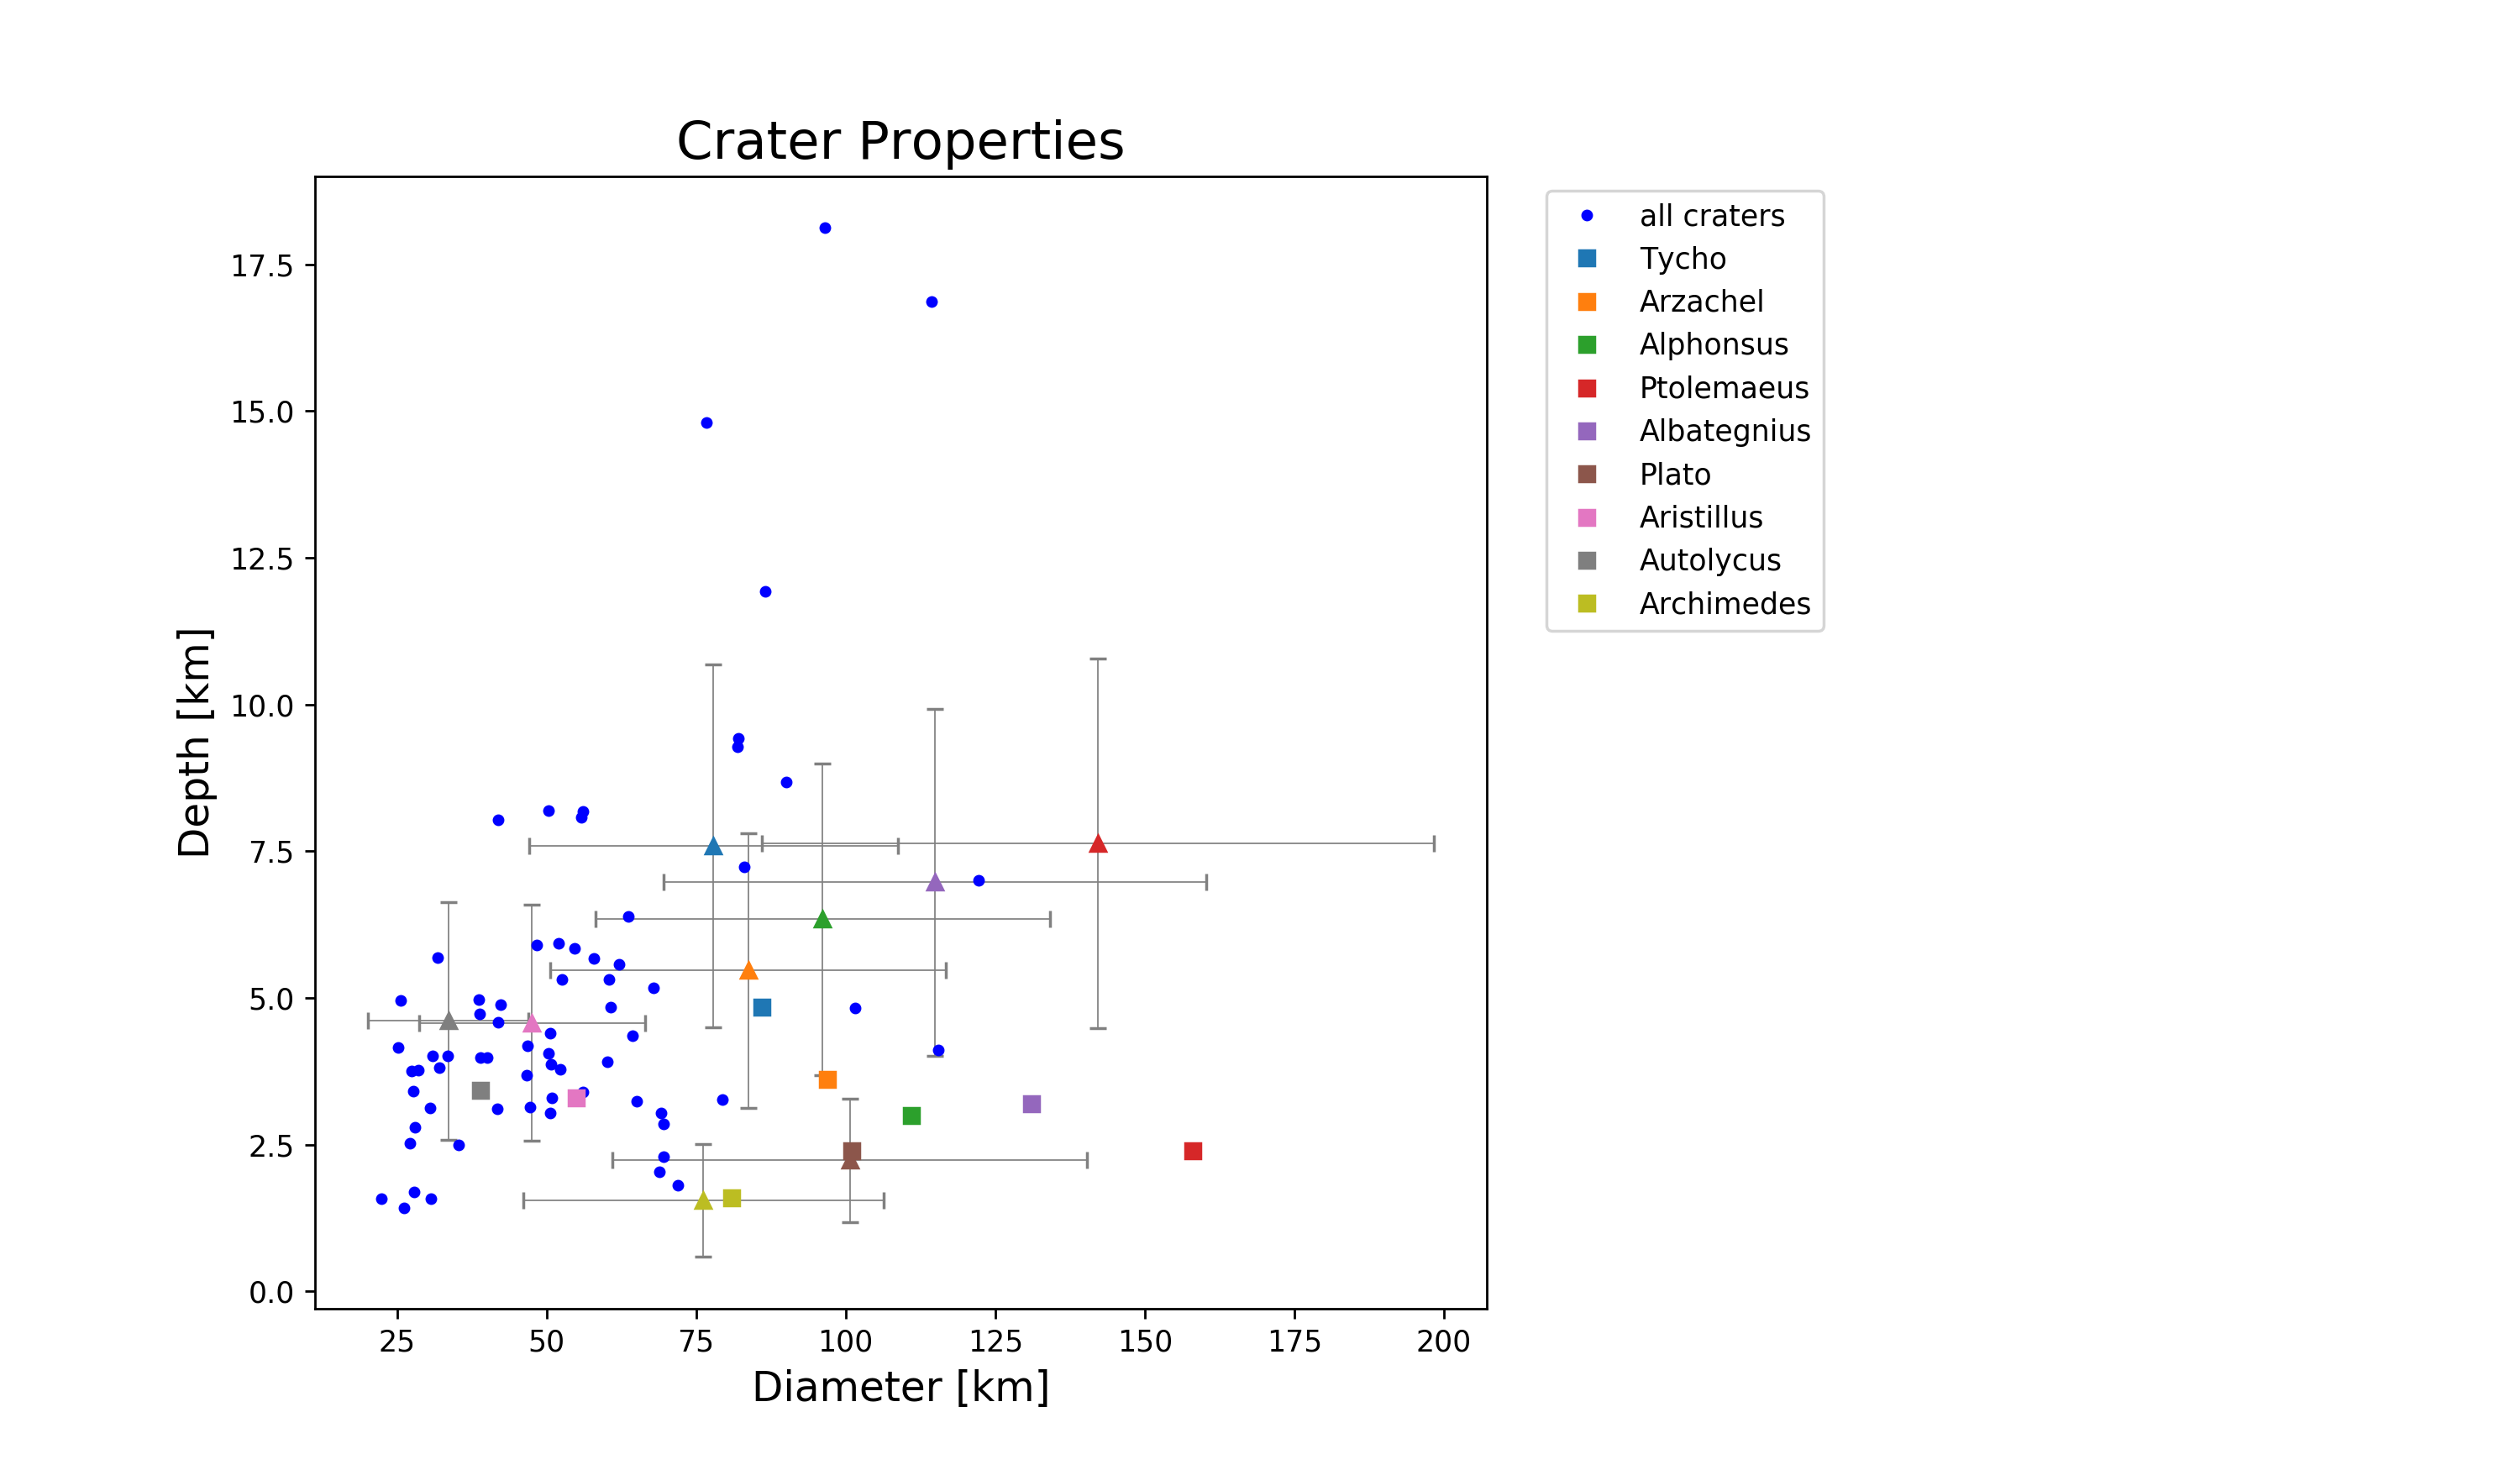

In [144]:
#plot 1
X=[]; Xerr=[]; Y=[]; Yerr=[]
grossX=[]; grossXerr=[]; grossY=[]; grossYerr=[]

indices=np.array([28,48, 53, 54, 55, 58,62,63,64])# indices der ausgewählten krater

for i in range(len(Diameters)):
    if i in indices:
        grossX.append(Diameters[i].n/1000)
        grossXerr.append(Diameters[i].s/1000)
        grossY.append(Depths[i].n/1000)
        grossYerr.append(Depths[i].s/1000)
    else:
        X.append(Diameters[i].n/1000)
        Xerr.append(Diameters[i].s/1000)
        Y.append(Depths[i].n/1000)
        Yerr.append(Depths[i].s/1000)
        
f=plt.figure(figsize=(12,7))
ax=f.add_subplot(111)
plt.errorbar(X, Y, yerr=None, xerr=None, color='blue',marker='o', markersize=3, linestyle='', capsize=3, label='all craters')

refX=np.array([86,   97,   111, 158, 131, 101, 55,  39,   81]) #Diameters in km der ausgewählten krater
refY=np.array([4.85, 3.61, 3,   2.4, 3.2, 2.4, 3.3, 3.43, 1.6]) #Depth in km der ausgewählten Krater

#markers=['o', "^", "s", "p", "P", "*", "x", "1", '+']
#colors=['green', 'orange', 'purple', 'black', 'red', 'magenta', 'yellow', 'cyan', 'navy']
colors=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
labels=['Tycho', 'Arzachel', 'Alphonsus', 'Ptolemaeus', 'Albategnius', 'Plato', 'Aristillus', 'Autolycus', 'Archimedes']
for n in range(9):
    ax.errorbar(grossX[n], grossY[n], yerr=grossYerr[n], xerr=grossXerr[n], color=colors[n],marker='^', markersize=5, linestyle='', elinewidth=0.5, ecolor='grey', capsize=3)#, label=labels[n])
    ax.errorbar(refX[n], refY[n], yerr=None, xerr=None, color=colors[n],marker='s', markersize=5, linestyle='', capsize=3, label=labels[n])

plt.title('Crater Properties', fontsize=18)
plt.xlabel('Diameter [km]', fontsize=14)
plt.ylabel('Depth [km]', fontsize=14)
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()
plt.savefig('Crater_distribution_tim_neu.pdf')#, additional_artists=art)#, bbox_inches='tight')
#plt.clf()

We have several craters which we measured several times. For the comparison with the literature values, we calculate the mean of those craters which we measured several times and which we want to compare. 

In [96]:
indices=np.array([28,48, 53, 54, 55, 58,62,63,64])# indices der ausgewählten krater

labels=['Tycho', 'Arzachel', 'Alphonsus', 'Ptolemaeus', 'Albategnius', 'Plato', 'Aristillus', 'Autolycus', 'Archimedes']

for n,i in enumerate(indices):
    print(labels[n])
    print(str(round(Diameters[i].n/100)/10)+ ' $\pm$ ' +str(round(Diameters[i].s/100)/10) +' & '+str(round(Depths[i].n/100.)/10)+ ' $\pm$ ' +str(round(Depths[i].s/100.)/10))

Tycho
77.9 $\pm$ 30.9 & 7.6 $\pm$ 3.1
Arzachel
83.7 $\pm$ 33.1 & 5.5 $\pm$ 2.3
Alphonsus
96.2 $\pm$ 38.0 & 6.3 $\pm$ 2.7
Ptolemaeus
142.1 $\pm$ 56.1 & 7.6 $\pm$ 3.1
Albategnius
114.9 $\pm$ 45.4 & 7.0 $\pm$ 3.0
Plato
100.7 $\pm$ 39.7 & 2.2 $\pm$ 1.1
Aristillus
47.6 $\pm$ 18.9 & 4.6 $\pm$ 2.0
Autolycus
33.6 $\pm$ 13.4 & 4.6 $\pm$ 2.0
Archimedes
76.2 $\pm$ 30.1 & 1.6 $\pm$ 1.0
